# Import Necessary Libraries

In [1]:
import os
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

2023-03-14 20:08:56.770493: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


# Define constants

In [2]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 30
TRAIN_DIR = 'train'
VAL_DIR = 'valid'

# Define data generators for training and validation sets

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=20, 
                                   width_shift_range=0.1, 
                                   height_shift_range=0.1, 
                                   shear_range=0.1, 
                                   zoom_range=0.1, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')

In [4]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(TRAIN_DIR, 
                                                    target_size=(IMAGE_SIZE, IMAGE_SIZE), 
                                                    batch_size=BATCH_SIZE, 
                                                    class_mode='categorical')

Found 70295 images belonging to 38 classes.


In [6]:
val_generator = val_datagen.flow_from_directory(VAL_DIR, 
                                                target_size=(IMAGE_SIZE, IMAGE_SIZE), 
                                                batch_size=BATCH_SIZE, 
                                                class_mode='categorical')

Found 17572 images belonging to 38 classes.


# Build the model

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(38, activation='softmax'))

2023-03-14 20:09:10.559878: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-03-14 20:09:10.565318: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-03-14 20:09:10.683654: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:927] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-14 20:09:10.683764: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1650 computeCapability: 7.5
coreClock: 1.515GHz coreCount: 14 deviceMemorySize: 4.00GiB deviceMemoryBandwidth: 178.84GiB/s
2023-03-14 20:09:10.683812: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-03-14 20:09:10.701074: I tensorflow/stream_executor/platfo

# Compile the model

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model

In [9]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=50, verbose=1)
mc = ModelCheckpoint(filepath="model.h5",
                     monitor= 'val_accuracy',
                     min_delta= 0.01,
                     patience=50,
                     verbose=1,
                     save_best_only= True)
cb = [es,mc]

In [10]:
from keras.models import load_model
new_model = load_model("model.h5")

In [11]:
history = new_model.fit(train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=10,
                    verbose=1,
                    callbacks=cb,
                    validation_data=val_generator,
                    validation_steps=len(val_generator))

2023-03-14 20:10:11.947963: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-03-14 20:10:11.948364: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2994285000 Hz


Epoch 1/10


2023-03-14 20:10:12.203722: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-03-14 20:10:12.605546: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7


2197/2197 [==============================] - 617s 279ms/step - loss: 0.1712 - accuracy: 0.9583 - val_loss: 0.1846 - val_accuracy: 0.9549

Epoch 00001: val_accuracy improved from -inf to 0.95493, saving model to 2new_model.h5
Epoch 2/10
2197/2197 [==============================] - 584s 266ms/step - loss: 0.1678 - accuracy: 0.9606 - val_loss: 0.2419 - val_accuracy: 0.9419

Epoch 00002: val_accuracy did not improve from 0.95493
Epoch 3/10
2197/2197 [==============================] - 557s 253ms/step - loss: 0.1527 - accuracy: 0.9621 - val_loss: 0.1125 - val_accuracy: 0.9709

Epoch 00003: val_accuracy improved from 0.95493 to 0.97092, saving model to 2new_model.h5
Epoch 4/10
2197/2197 [==============================] - 555s 253ms/step - loss: 0.1762 - accuracy: 0.9578 - val_loss: 0.0746 - val_accuracy: 0.9843

Epoch 00004: val_accuracy improved from 0.97092 to 0.98429, saving model to 2new_model.h5
Epoch 5/10
2197/2197 [==============================] - 551s 251ms/step - loss: 0.1730 - accu

In [12]:
new_model.save('model.h5')

In [13]:
h = history.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

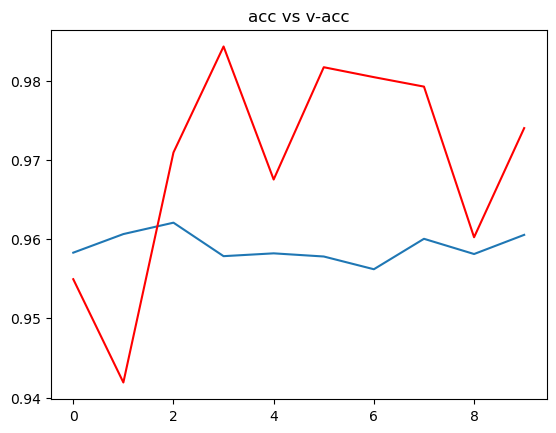

In [14]:
import matplotlib.pyplot as plt
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")
plt.title("acc vs v-acc")
plt.show()

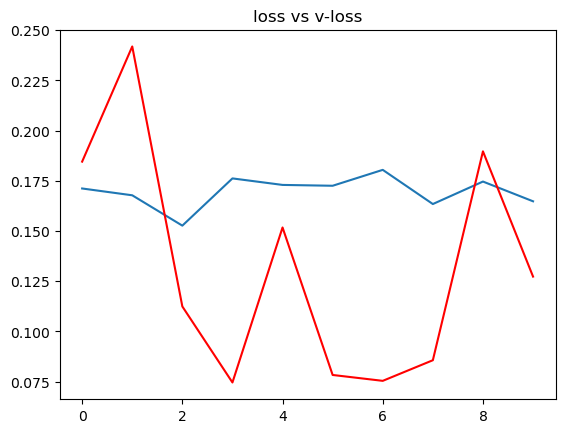

In [15]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")
plt.title("loss vs v-loss")
plt.show()

In [16]:
dict(zip(list(train_generator.class_indices.values()),list(train_generator.class_indices.keys())))

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [17]:
ref = dict(zip( list(train_generator.class_indices.values()), list(train_generator.class_indices.keys()) ))

In [18]:
def prediction(path):

  img = load_img(path, target_size= (224,224))

  i = img_to_array(img)

  im = preprocess_input(i)

  img = np.expand_dims(im, axis= 0)
  
  pred = np.argmax(model.predict(img))

  print(f" the image belongs to {ref[pred] }")

In [26]:
from keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
path = "test/"
prediction(path)

 the image belongs to Blueberry___healthy
